# Preparación del contexto

In [28]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuracion
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

# (Opcional) Configuración general de Seaborn
# Opciones de estilo: darkgrid, whitegrid, dark, white, ticks
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.1)

#Los DatSet

In [25]:
# Carga de datos
df_rrhh = pd.read_csv("rrhh.csv")
df_ventas = pd.read_csv("ventas.csv")

# Conversión de fecha (ventas)
df_ventas["fecha"] = pd.to_datetime(df_ventas["fecha"], errors="coerce")

# Revisión rápida
print("RRHH")
print(df_rrhh.head())
print("Ventas")
print(df_ventas.head())
print("Tam. ventas:",len(df_ventas))

RRHH
   id_empleado   nombre  edad    ciudad departamento  salario estado_civil
0            1    Lucía  57.0     Piura       Ventas   6678.0   Divorciado
1            2   Carlos  43.0  Trujillo     Sistemas   7764.0      Soltero
2            3   Camila   NaN      Lima     Finanzas   4548.0      Soltero
3            4  Daniela  35.0  Chiclayo       Ventas   6646.0   Divorciado
4            5  Valeria  49.0  Chiclayo     Finanzas   7280.0      Soltero
Ventas
   id_venta      fecha                 producto    categoria  cantidad  precio_unit  descuento_pct  descuento_s    total      vendedor       region          canal      metodo_pago
0         1 2024-03-12  Impresora Epson EcoTank   Impresoras         2        580.0             10        116.0   1044.0   Carlos Ríos     Arequipa  Tienda física   Tarjeta débito
1         2 2024-04-21    Tablet Samsung Tab S8      Tablets         2       1850.0              0          0.0   3700.0    Jorge Díaz   Lima Norte  Tienda física         Efectiv

# Fuentes de datos de seaborn

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
df_iris = sns.load_dataset("iris")
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#Grafico basico con matplotlib

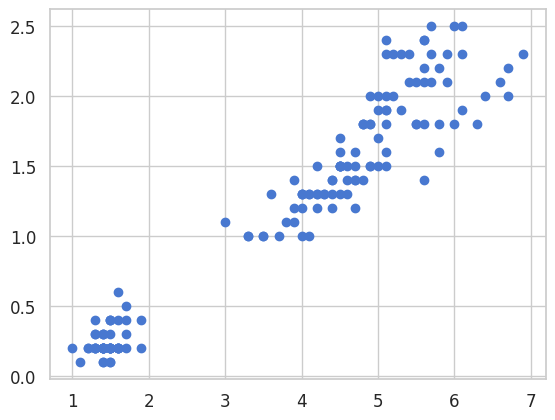

In [7]:
plt.scatter(df_iris["petal_length"], df_iris["petal_width"])
plt.show()

#Grafico basico con Seaborn

<Axes: xlabel='petal_length', ylabel='petal_width'>

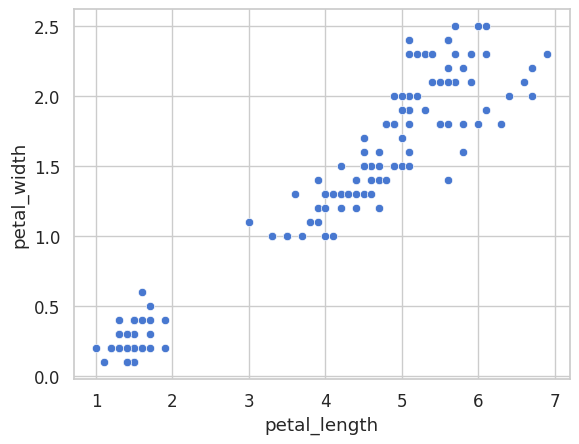

In [8]:
sns.scatterplot(x="petal_length", y="petal_width", data=df_iris)

<Axes: xlabel='petal_length', ylabel='petal_width'>

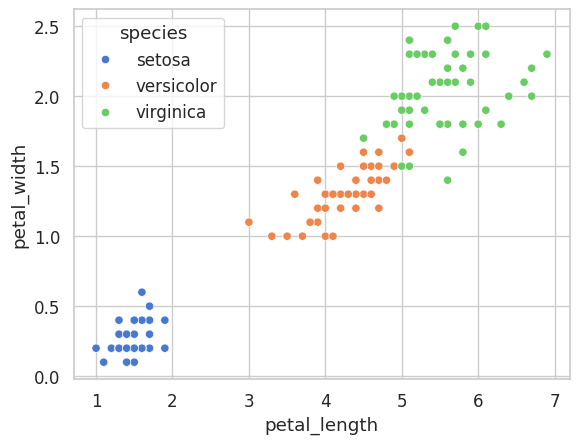

In [9]:
sns.scatterplot(x="petal_length", y="petal_width", data=df_iris, hue="species")

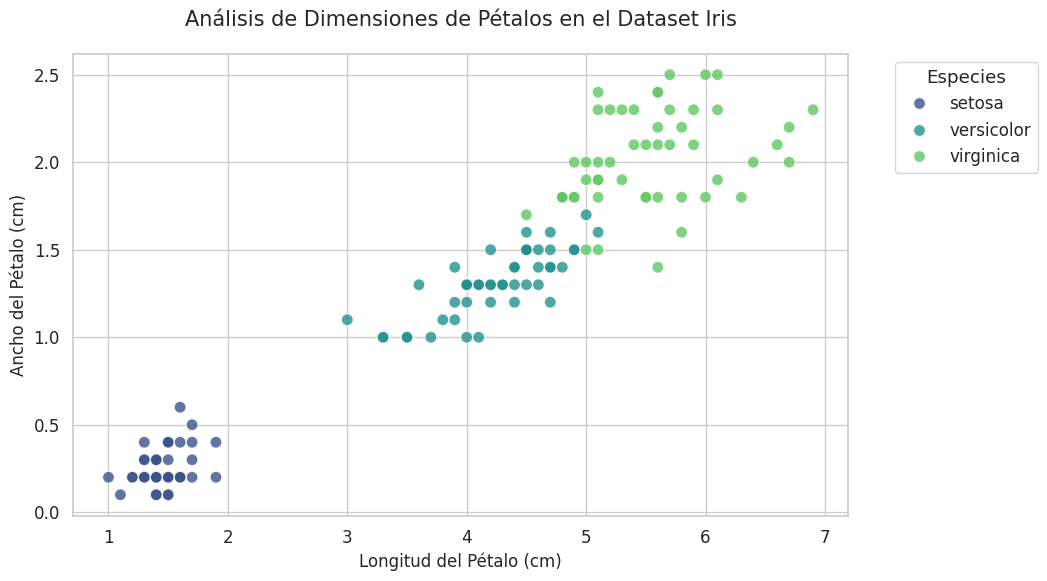

In [10]:
plt.figure(figsize=(10, 6))
#sns.set_style("whitegrid")

# Graficar con mejoras
ax = sns.scatterplot(
    x="petal_length",
    y="petal_width",
    hue="species",
    data=df_iris,
    palette="viridis",
    s=70,
    alpha=0.8
)

# Personalizar etiquetas
plt.title("Análisis de Dimensiones de Pétalos en el Dataset Iris", fontsize=15, pad=20)
plt.xlabel("Longitud del Pétalo (cm)", fontsize=12)
plt.ylabel("Ancho del Pétalo (cm)", fontsize=12)

# Mover la leyenda fuera del gráfico
plt.legend(title="Especies", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


#Gráfico de Líneas — Tendencia de ventas mensuales

In [16]:
# Extraer mes y agrupar
df_ventas['mes'] = df_ventas['fecha'].dt.to_period('M')
print(df_ventas.head())
ventas_mes = df_ventas.groupby('mes')['total'].sum().reset_index()
ventas_mes['mes'] = ventas_mes['mes'].astype(str)
print(ventas_mes.head(15))

   id_venta      fecha                 producto    categoria  cantidad  precio_unit  descuento_pct  descuento_s    total      vendedor       region          canal      metodo_pago      mes
0         1 2024-03-12  Impresora Epson EcoTank   Impresoras         2        580.0             10        116.0   1044.0   Carlos Ríos     Arequipa  Tienda física   Tarjeta débito  2024-03
1         2 2024-04-21    Tablet Samsung Tab S8      Tablets         2       1850.0              0          0.0   3700.0    Jorge Díaz   Lima Norte  Tienda física         Efectivo  2024-04
2         3 2024-01-04      Monitor Dell 32" 4K    Monitores         7       1950.0             15       2047.5  11602.5  María Flores        Piura     E-commerce  Tarjeta crédito  2024-01
3         4 2024-02-17   Mouse Razer DeathAdder  Periféricos         5        180.0              5         45.0    855.0     Luis Vega  Lima Centro  Tienda física         Efectivo  2024-02
4         5 2024-07-12    Impresora HP LaserJet   Impre

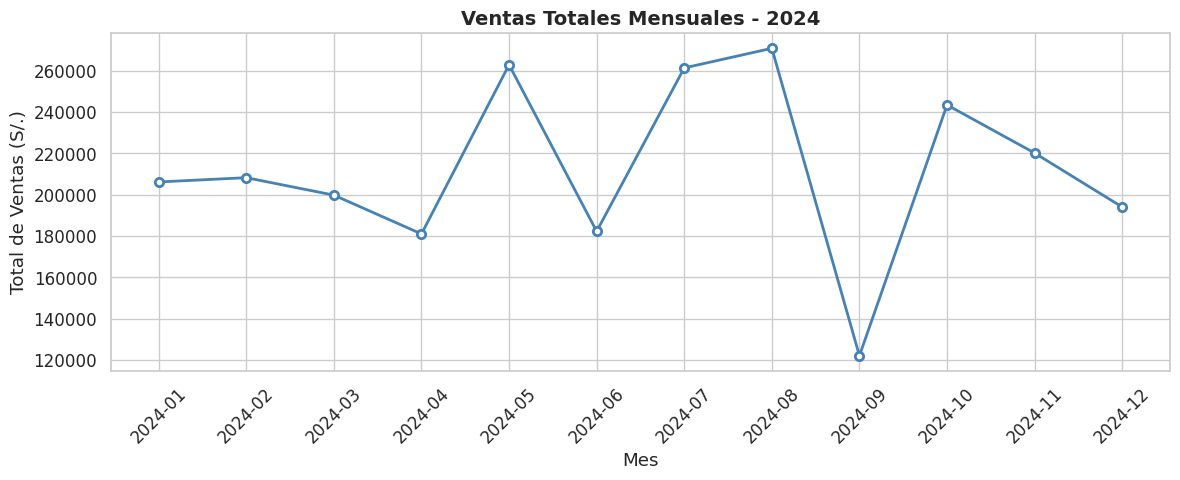

In [14]:
# Extraer mes y agrupar
df_ventas['mes'] = df_ventas['fecha'].dt.to_period('M')
ventas_mes = df_ventas.groupby('mes')['total'].sum().reset_index()
ventas_mes['mes'] = ventas_mes['mes'].astype(str)
# Crear gráfico
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(ventas_mes['mes'], ventas_mes['total'],
marker='o', linewidth=2, color='steelblue',
markerfacecolor='white', markeredgewidth=2)
ax.set_title('Ventas Totales Mensuales - 2024', fontsize=14, fontweight='bold')
ax.set_xlabel('Mes')
ax.set_ylabel('Total de Ventas (S/.)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Gráfico de Barras — Ventas por Región

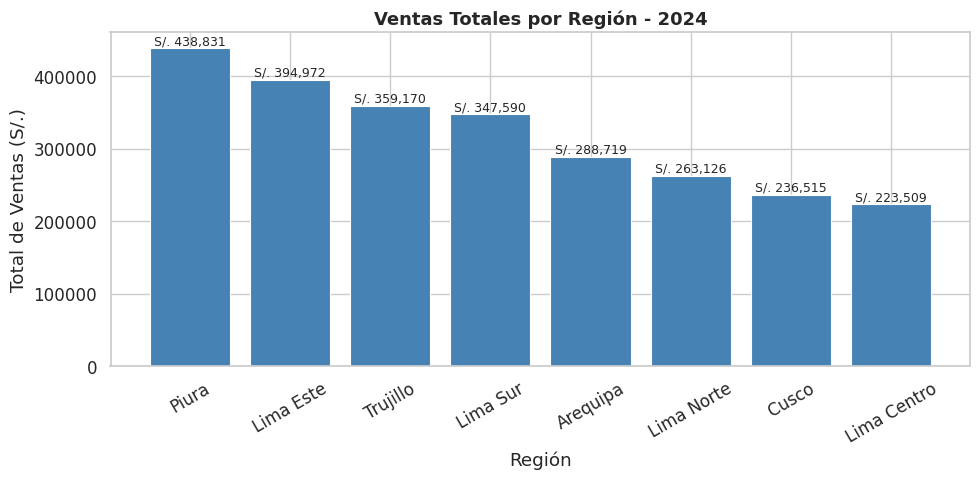

In [17]:
# Datos
ventas_region = df_ventas.groupby('region')['total'].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 5))
barras = ax.bar(ventas_region.index, ventas_region.values,
color='steelblue', edgecolor='white', linewidth=0.8)
# Añadir etiquetas de valor sobre cada barra
for barra in barras:
    height = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2., height + 1000,f'S/. {height:,.0f}', ha='center', va='bottom', fontsize=9)
ax.set_title('Ventas Totales por Región - 2024', fontsize=13, fontweight='bold')
ax.set_xlabel('Región')
ax.set_ylabel('Total de Ventas (S/.)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#Histograma — Distribución de Salarios

In [18]:
df_rrhh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_empleado   200 non-null    int64  
 1   nombre        200 non-null    object 
 2   edad          190 non-null    float64
 3   ciudad        190 non-null    object 
 4   departamento  200 non-null    object 
 5   salario       190 non-null    float64
 6   estado_civil  190 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB


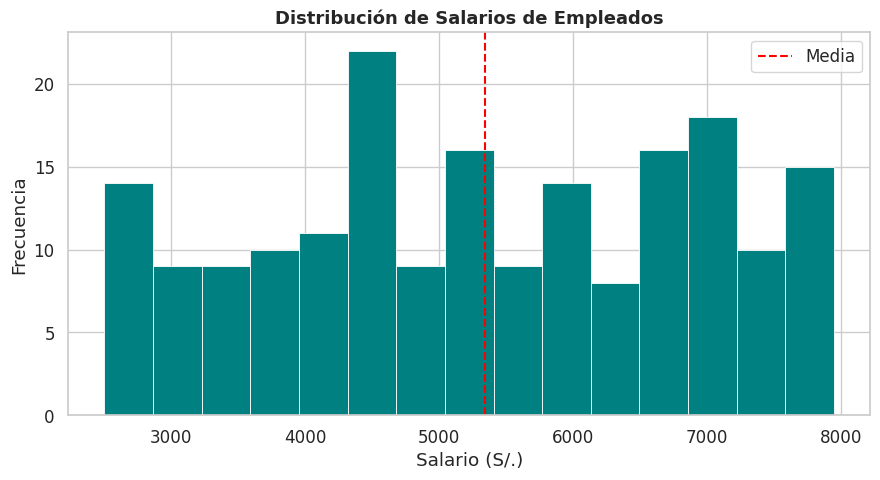

In [20]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.hist(df_rrhh['salario'].dropna(), bins=15, color='teal', edgecolor='white', linewidth=0.6)
ax.set_title('Distribución de Salarios de Empleados', fontsize=13, fontweight='bold')
ax.set_xlabel('Salario (S/.)')
ax.set_ylabel('Frecuencia')
ax.axvline(df_rrhh['salario'].mean(), color='red', linestyle='--', linewidth=1.5, label='Media')
ax.legend()
plt.tight_layout()
plt.show()

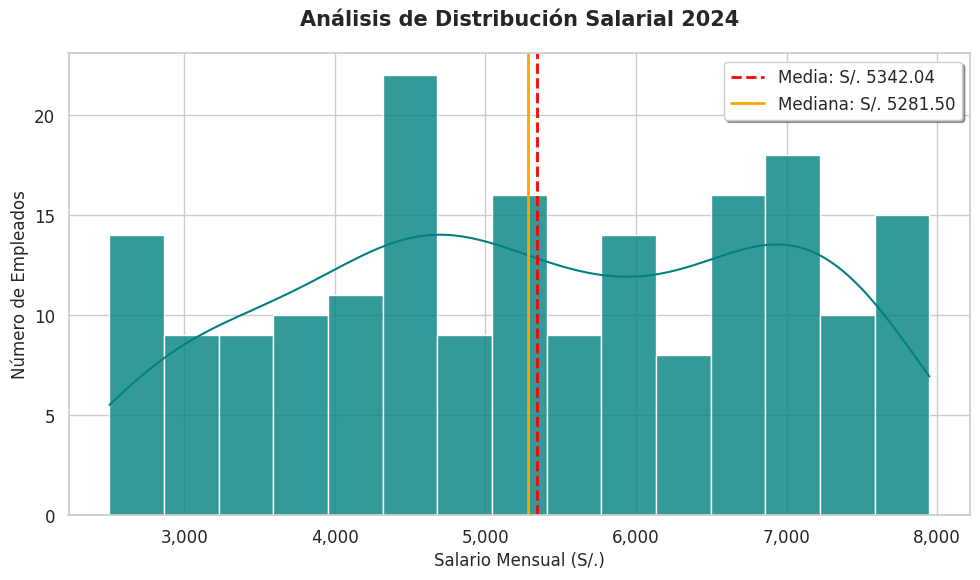

In [21]:
# Configuración de estilo profesional
#sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Datos
data = df_rrhh['salario'].dropna()
media = data.mean()
mediana = data.median()

# Histograma con curva de densidad (KDE)
sns.histplot(data, bins=15, color='teal', edgecolor='white', kde=True, ax=ax, alpha=0.8)

# Líneas de referencia
ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: S/. {media:.2f}')
ax.axvline(mediana, color='orange', linestyle='-', linewidth=2, label=f'Mediana: S/. {mediana:.2f}')

# Personalización de etiquetas
ax.set_title('Análisis de Distribución Salarial 2024', fontsize=15, fontweight='bold', pad=20)
ax.set_xlabel('Salario Mensual (S/.)', fontsize=12)
ax.set_ylabel('Número de Empleados', fontsize=12)

# Formatear el eje X para que los números sean más legibles
ax.xaxis.set_major_formatter('{x:,.0f}')

# Leyenda y ajuste final
ax.legend(frameon=True, shadow=True)
plt.tight_layout()

plt.show()


#Gráfico de Dispersión (Scatter) — Cantidad vs. Total de Venta

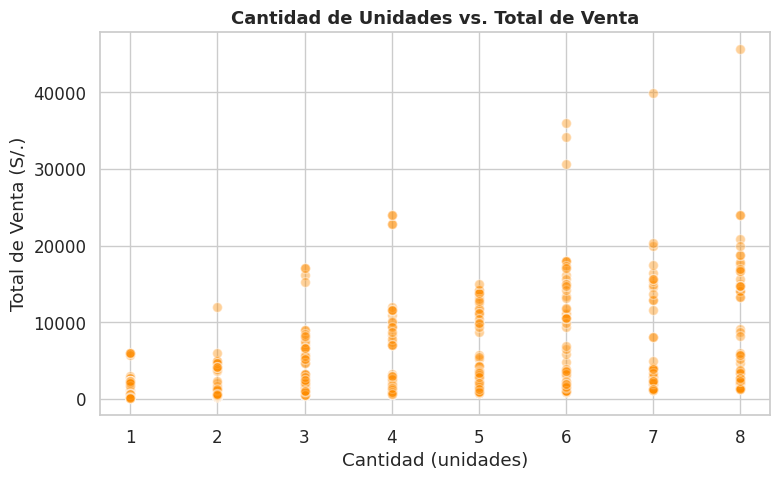

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(df_ventas['cantidad'], df_ventas['total'],
alpha=0.4, color='darkorange', edgecolors='white', s=50)
ax.set_title('Cantidad de Unidades vs. Total de Venta', fontsize=13,
fontweight='bold')
ax.set_xlabel('Cantidad (unidades)')
ax.set_ylabel('Total de Venta (S/.)')
plt.tight_layout()
plt.show()

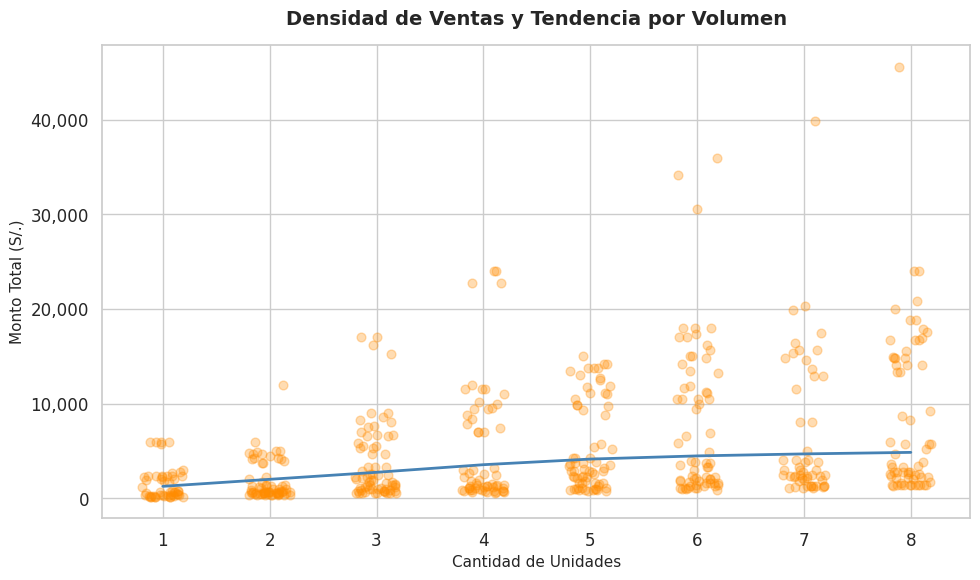

In [23]:
# Configuración de estilo
#sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Graficar con Jitter y Regresión
# 'x_jitter' separa los puntos horizontalmente para ver la densidad
# 'lowess=True' dibuja una línea de tendencia suave que se ajusta a los datos
ax = sns.regplot(
    data=df_ventas,
    x='cantidad',
    y='total',
    scatter_kws={'alpha':0.3, 'color':'darkorange', 's':40},
    line_kws={'color':'steelblue', 'lw':2},
    x_jitter=0.2,
    lowess=True
)

# Personalización profesional
plt.title('Densidad de Ventas y Tendencia por Volumen', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Cantidad de Unidades', fontsize=11)
plt.ylabel('Monto Total (S/.)', fontsize=11)

# Formatear el eje Y para lectura financiera
ax.yaxis.set_major_formatter('{x:,.0f}')

plt.tight_layout()
plt.show()


#Gráfico de Pastel (Pie) — Distribución por Canal de Venta

canal
Tienda física    242
E-commerce       178
Corporativo       80
Name: count, dtype: int64


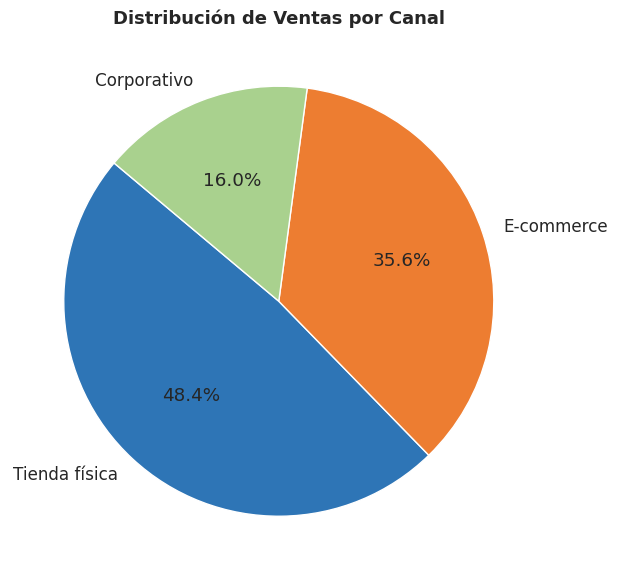

In [24]:
canal_counts = df_ventas['canal'].value_counts()
print(canal_counts)
fig, ax = plt.subplots(figsize=(7, 6))
ax.pie(canal_counts.values,
       labels=canal_counts.index,
       autopct='%1.1f%%',
       startangle=140,
       colors=['#2E75B6', '#ED7D31', '#A9D18E']
)
ax.set_title('Distribución de Ventas por Canal', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

#Ejemplo Completo — Gráfico de Barras Personalizado

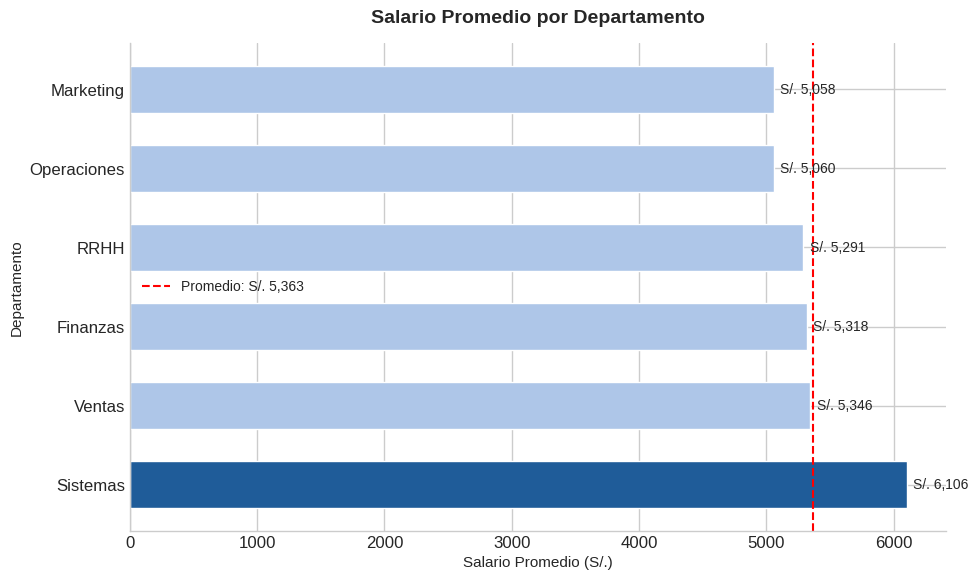

In [29]:
# Calcular salario promedio por departamento
sal_depto = df_rrhh.groupby('departamento')['salario'].mean().sort_values(ascending=False)
# Aplicar estilo global
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
colores = ['#1F5C99' if s >= sal_depto.mean() else '#AEC6E8' for s in
sal_depto.values]
barras = ax.barh(sal_depto.index, sal_depto.values,color=colores, edgecolor='white', height=0.6)
# Etiquetas de valor al lado de cada barra
for barra in barras:
    width = barra.get_width()
    ax.text(width + 50, barra.get_y() + barra.get_height() / 2,f'S/. {width:,.0f}', va='center', fontsize=10)
# Línea de promedio general
ax.axvline(sal_depto.mean(), color='red', linestyle='--',
linewidth=1.5, label=f'Promedio: S/. {sal_depto.mean():,.0f}')
# Personalización
ax.set_title('Salario Promedio por Departamento', fontsize=14,
fontweight='bold', pad=15)
ax.set_xlabel('Salario Promedio (S/.)', fontsize=11)
ax.set_ylabel('Departamento', fontsize=11)
ax.legend(fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('salario_departamento.png', dpi=150, bbox_inches='tight')
plt.show()
